In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [10]:
results_path = '../src_results/7.csv'
if not os.path.exists(results_path):
    print(f"Error: File {results_path} not found. Run the C++ benchmark first!")
else:
    print("Data file found. Loading...")

Data file found. Loading...


In [11]:
df = pd.read_csv(results_path)

# Базовое время (Atomic, 1 поток)
base_times = df[(df['Threads'] == 1) & (df['Method'] == 'OMP_Reduction')][['Size', 'Time']]
base_times = base_times.rename(columns={'Time': 'BaseTime'})

df = pd.merge(df, base_times, on=['Size'], how='left')

df['Time_ms'] = df['Time'] * 1000
df['Speedup'] = df['BaseTime'] / df['Time']
df['Efficiency'] = df['Speedup'] / df['Threads']

methods = df['Method'].unique()
metrics = [
    ('Time_ms', 'Time (ms)'),
    ('Speedup', 'Speedup'),
    ('Efficiency', 'Efficiency')
]

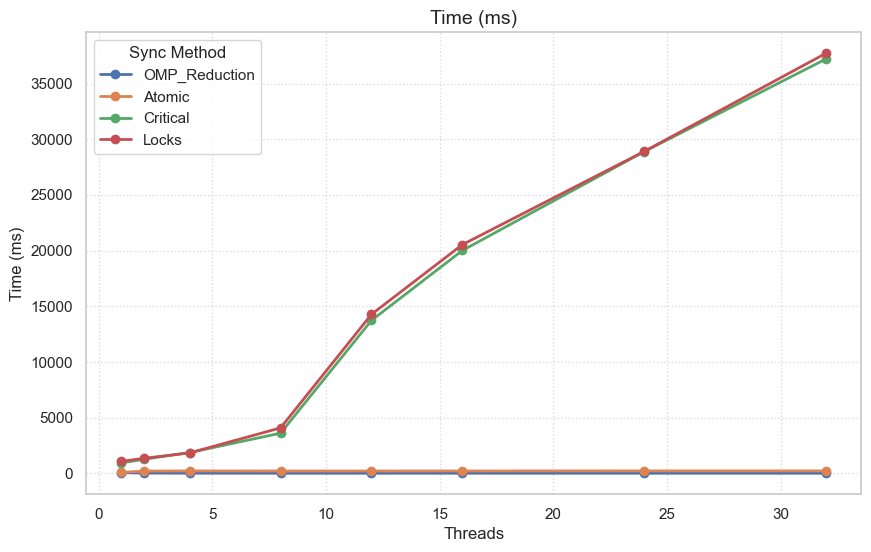

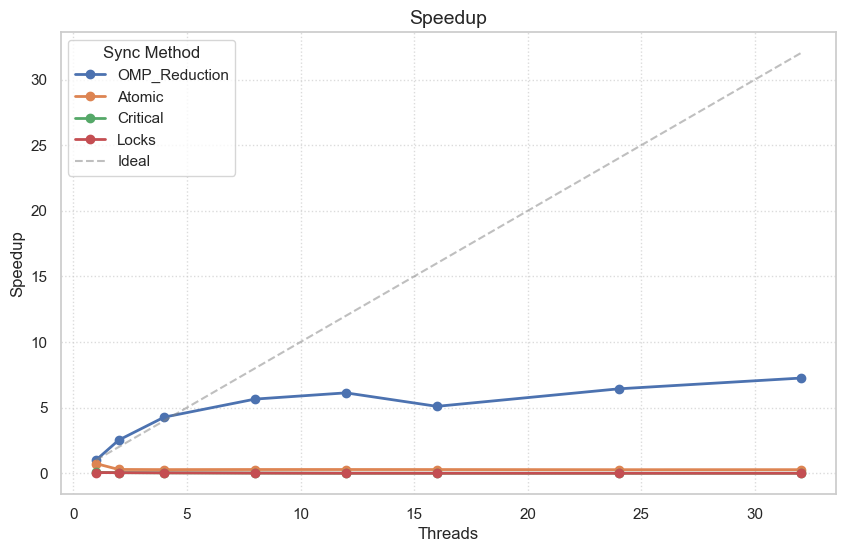

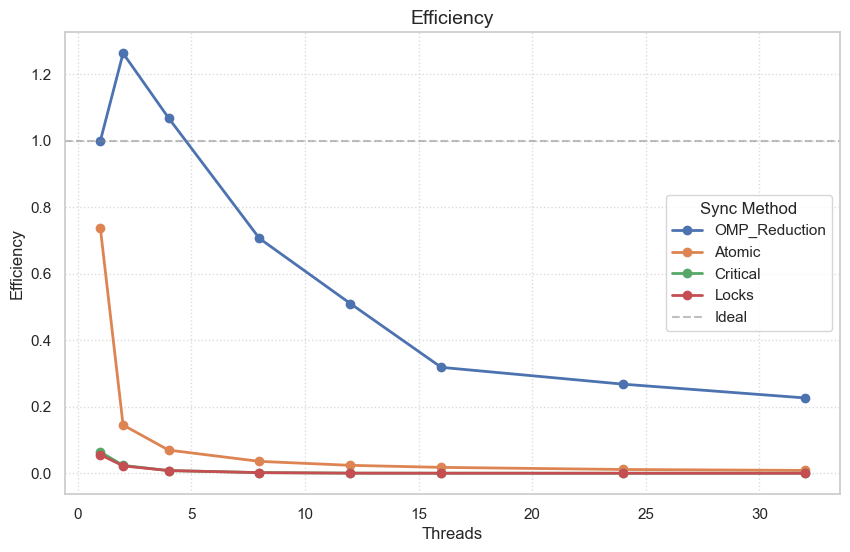

In [12]:
for metric, ylabel in metrics:
    plt.figure(figsize=(10, 6))
    
    for method in methods:
        data = df[df['Method'] == method].sort_values('Threads')
        plt.plot(data['Threads'], data[metric], marker='o', linewidth=2, label=method)
    
    # Идеальные линии
    if metric == 'Speedup':
        max_th = df['Threads'].max()
        plt.plot([1, max_th], [1, max_th], '--', color='gray', alpha=0.5, label='Ideal')
    elif metric == 'Efficiency':
        plt.axhline(1.0, linestyle='--', color='gray', alpha=0.5, label='Ideal')

    plt.title(ylabel, fontsize=14)
    plt.xlabel('Threads', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend(title='Sync Method')

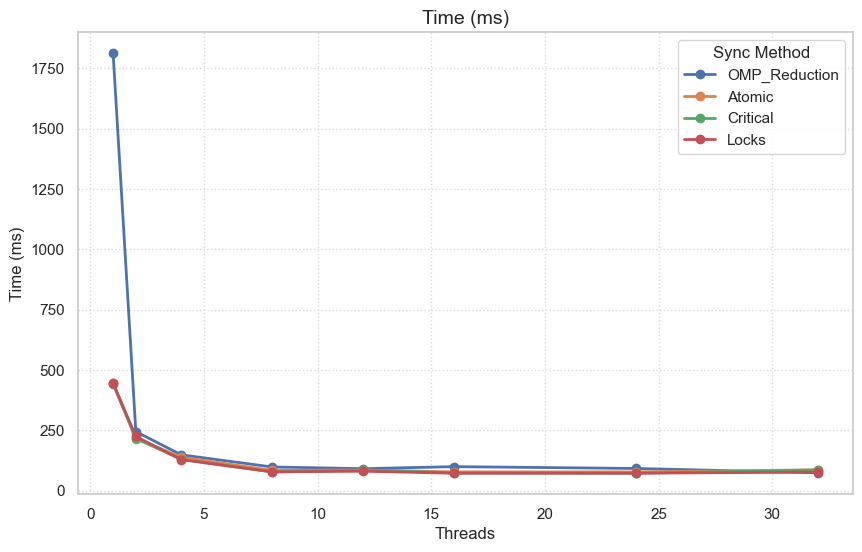

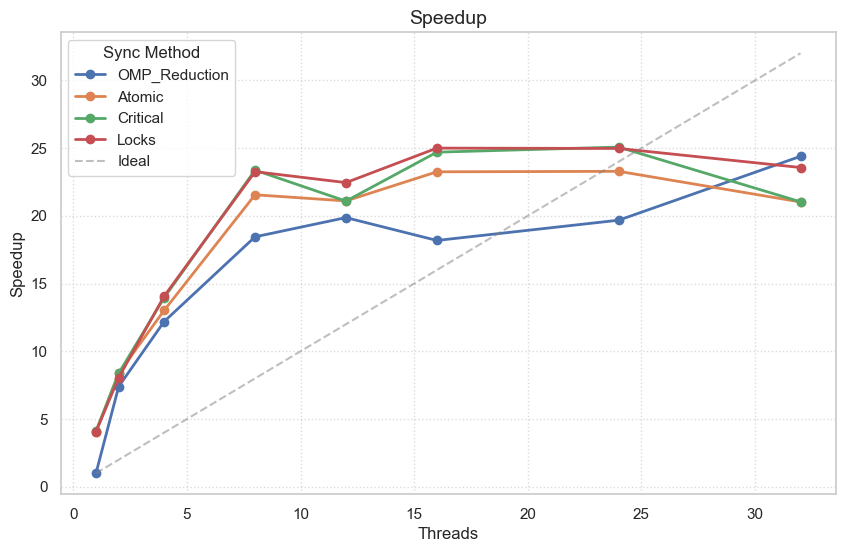

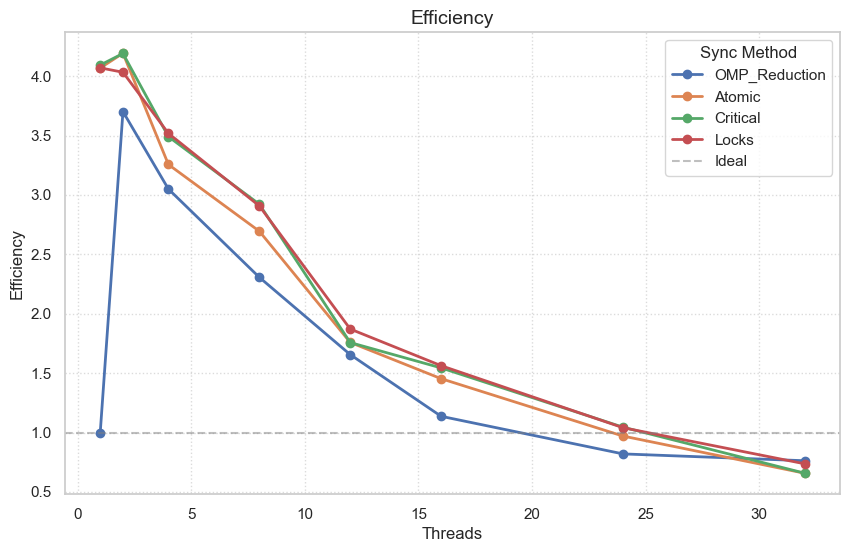

In [5]:
for metric, ylabel in metrics:
    plt.figure(figsize=(10, 6))
    
    for method in methods:
        data = df[df['Method'] == method].sort_values('Threads')
        plt.plot(data['Threads'], data[metric], marker='o', linewidth=2, label=method)
    
    # Идеальные линии
    if metric == 'Speedup':
        max_th = df['Threads'].max()
        plt.plot([1, max_th], [1, max_th], '--', color='gray', alpha=0.5, label='Ideal')
    elif metric == 'Efficiency':
        plt.axhline(1.0, linestyle='--', color='gray', alpha=0.5, label='Ideal')

    plt.title(ylabel, fontsize=14)
    plt.xlabel('Threads', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend(title='Sync Method')
    